In [1]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import numpy as np

from datetime import datetime
from datetime import timedelta

import pandas as pd

In [2]:
from lib.dataeng import Etl

In [3]:
etl = Etl()

etl.repo

'/home/benjamin/Downloads/'

In [4]:
df_weight_raw, df_food_raw, df_exos_raw, df_all = etl.extract_store_all()


Le fichier poids le plus récent est : data_BEN_1708497738.zip, parmi :
data_BEN_1708497738.zip
data_BEN_1708405395.zip
data_BEN_1708327447.zip
data_BEN_1708234834.zip

Le fichier food le plus récent est : File-Export-2020-08-03-to-2024-02-21.zip, parmi
File-Export-2020-08-03-to-2024-02-21.zip
File-Export-2020-08-03-to-2024-02-18.zip
File-Export-2020-08-03-to-2024-02-19.zip
File-Export-2020-08-03-to-2024-02-20.zip

Le fichier exercices le plus récent est : polar-user-data-export_703c11e2-d0c0-42d0-84a6-665ce3a9f847.zip, parmi :
polar-user-data-export_12baa4ce-79a5-40f8-ad40-74308f7c2c26.zip
polar-user-data-export_703c11e2-d0c0-42d0-84a6-665ce3a9f847.zip


100%|██████████| 1868/1868 [01:13<00:00, 25.45it/s]


In [5]:
df_weight = df_weight_raw.groupby('Date').mean()

In [6]:
df_std = df_weight_raw.groupby('Date').std()

for colname in df_weight.columns:
    std_colname = 'std_' + colname
    df_weight[std_colname] = df_std[colname]

In [7]:
df_weight.dropna(inplace=True)

df_weight

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,std_Masse_Totale,std_Masse_Grasse,std_Masse_Osseuse,std_Masse_Musculaire,std_Masse_Hydrique,std_MG%,std_BMR
Date,,,,,,,,,,,,,,
2023-03-04,70.656667,11.420000,2.961667,56.258333,39.496667,0.161627,1649.512000,0.036148,0.058992,0.004082,0.056716,0.066533,0.000812,1.264415
2023-03-05,71.880000,11.848571,3.000000,57.014286,40.180000,0.164837,1666.678857,0.092376,0.106369,0.000000,0.037353,0.053229,0.001281,0.821828
2023-03-06,71.030000,10.924000,3.010000,57.082000,40.476000,0.153794,1668.289600,0.023452,0.030496,0.000000,0.031937,0.040988,0.000427,0.787734
2023-03-07,72.185000,11.126667,3.060000,57.986667,41.366667,0.154141,1688.860000,0.018708,0.050067,0.000000,0.052026,0.072019,0.000706,1.255156
2023-03-08,72.283333,10.178333,3.131667,58.956667,42.821667,0.140811,1711.468000,0.042269,0.052313,0.004082,0.038297,0.064317,0.000674,0.893206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-17,74.114000,12.265333,3.096000,58.736667,41.828000,0.165492,1705.931200,0.156150,0.085262,0.006325,0.090211,0.083683,0.000875,2.061910
2024-02-18,74.788125,12.853125,3.096250,58.823750,41.781250,0.171859,1707.796000,0.142184,0.103455,0.005000,0.074733,0.071729,0.001124,1.715354
2024-02-19,74.280000,12.382000,3.098000,58.784000,41.847000,0.166692,1706.996800,0.112151,0.098972,0.004216,0.057966,0.064987,0.001125,1.299196


In [8]:
PAST = 40 # on regarde les N derniers jours
PAST_REG = 30 # horizon de temps passé pour la régression
FUTUR = 30 # vers les M prochains jours
MOY = 1

df_weight2 = df_weight.rolling(window=MOY).mean()[-PAST:]

df_food2 = df_food_raw.groupby('Date').sum(numeric_only=True).rolling(window=MOY).mean()[-PAST:]

df_exos2 = df_exos_raw.groupby('exo_date').sum(numeric_only=True)
BMR = df_weight['BMR'][-PAST:].mean()
df_exos2['exo_cals_nets'] = df_exos2['exo_cals_bruts'] - df_exos2['exo_duree']/3600*(BMR/24)
df_exos2 = df_exos2.rolling(window=MOY).mean()[-PAST:]

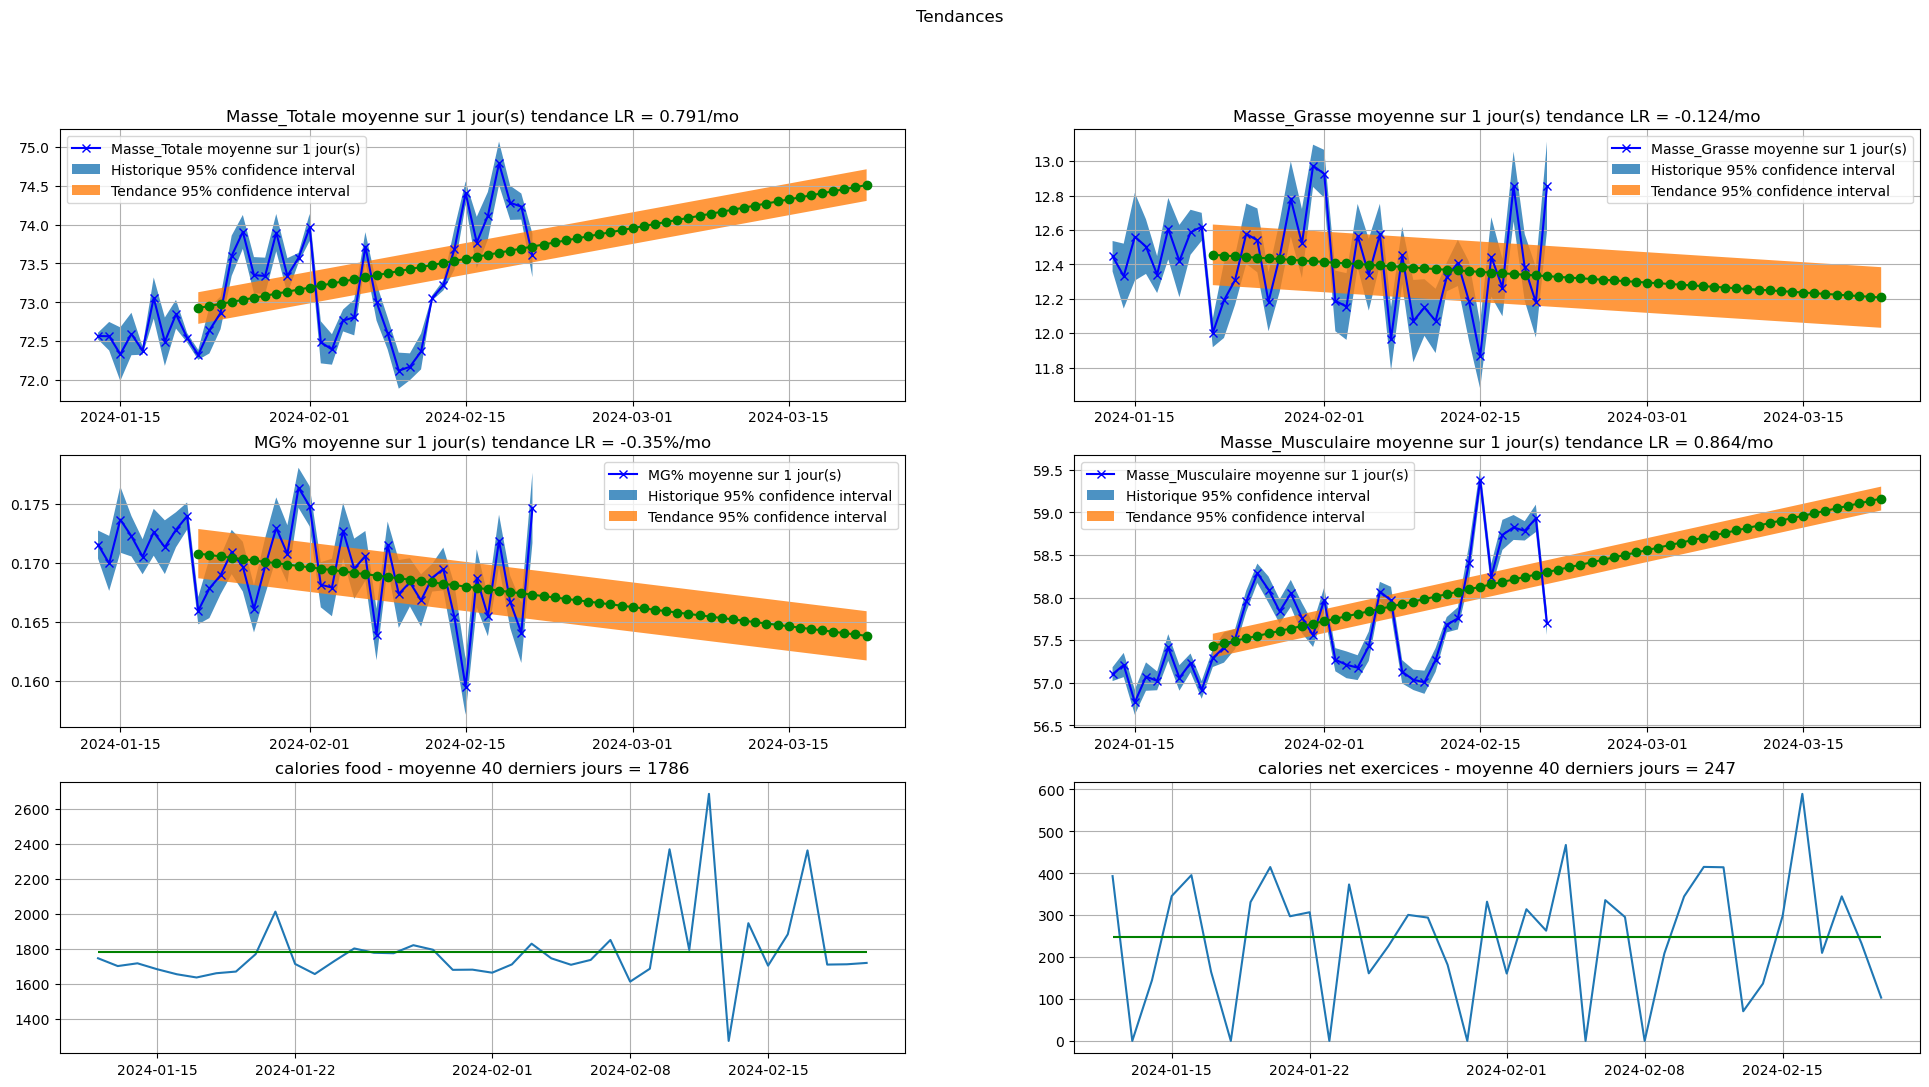

In [9]:
fig, ax = plt.subplots(figsize=(24,12), nrows=3, ncols=2)

list_to_display = ['Masse_Totale', 'Masse_Grasse', 'MG%', 'Masse_Musculaire']

for i, name in enumerate(list_to_display):
    r = i//2
    c = i%2
    name_std = 'std_' + name

    # historique avec standard deviation
    lbl = name + f' moyenne sur {MOY} jour(s)'
    ax[r,c].plot(df_weight2[name], marker = 'x', color='blue', label=lbl)
    ax[r,c].fill_between(
            df_weight2.index,
            df_weight2[name] - 1.96 * df_weight2[name_std],
            df_weight2[name] + 1.96 * df_weight2[name_std],
            alpha=0.8,
            label=r"Historique 95% confidence interval",
        )
    ax[r,c].grid(True)

    # tendance
    full_std = df_weight2[name_std].mean()
    # projection LR
    lrr = LinearRegression()
    X_past = np.array( [ d.toordinal() for d in df_weight2.index[-PAST_REG:] ] ).reshape(-1,1)
    y = df_weight2[name][-PAST_REG:]
    lrr.fit(X_past, y)
    if name=='MG%':
        lbl += f' tendance LR = {lrr.coef_[0]*30*100:.2f}%/mo'
    else:
        lbl += f' tendance LR = {lrr.coef_[0]*30:.3f}/mo'
    # calcul tendance
    X_trend = [ df_weight2.index[-1] + timedelta(days=i) for i in range(-PAST_REG, FUTUR+1 )]
    X_trend = np.array( [ d.toordinal() for d in X_trend ] ).reshape(-1,1)
    y_pred = lrr.predict(X_trend)

    X_trend_days = [ datetime.fromordinal(X_trend[i][0]) for i in range(len(X_trend)) ]
    df_pred = pd.DataFrame( data={"tendance" : y_pred}, index=X_trend_days )
    ax[r,c].plot(df_pred, marker='o', color='green')

    ax[r,c].fill_between(
            df_pred.index,
            df_pred['tendance'] - 1.96 * full_std,
            df_pred['tendance'] + 1.96 * full_std,
            alpha=0.8,
            label=r"Tendance 95% confidence interval",
    )

    ax[r,c].legend()
    ax[r,c].set_title(lbl)
    
fig.suptitle(f'Tendances')

# -- moyenne calories --

xmin = df_food2.index[0]
xmax = df_food2.index[-1]

ax[2,0].plot(df_food2['Calories'])
cal_moy = df_food2['Calories'].mean()
ax[2,0].hlines(cal_moy, xmin=xmin, xmax=xmax, color='green')
ax[2,0].set_title(f'calories food - moyenne {PAST} derniers jours = {cal_moy:.0f}')
ax[2,0].grid(True)

# -- moyenne exercices ----

ax[2,1].plot(df_exos2['exo_cals_nets'])
exo_nets = df_exos2['exo_cals_nets'].mean()
ax[2,1].hlines(exo_nets, xmin=xmin, xmax=xmax, color='green')
ax[2,1].set_title(f'calories net exercices - moyenne {PAST} derniers jours = {exo_nets:.0f}')
ax[2,1].grid(True)


plt.show()